In [2]:
import pandas as pd

df = pd.read_csv("../Lab1/after_lab1.csv")
df = df.drop(["Name", "Ticket"], axis = "columns")
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
0,1,0,1.0,22.0,0.125,0.0,0.014151,True,True,False,False,False,False,False,False,False,True
1,2,1,0.0,38.0,0.125,0.0,0.139136,False,False,True,False,False,False,False,False,False,False
2,3,1,1.0,26.0,0.000,0.0,0.015469,False,True,False,False,False,False,False,False,False,True
3,4,1,0.0,35.0,0.125,0.0,0.103644,False,False,True,False,False,False,False,False,False,True
4,5,0,1.0,35.0,0.000,0.0,0.015713,True,True,False,False,False,False,False,False,False,True


In [14]:
#Решить задачу классификации методом случайного леса. Оценить работу модели через OOB данные
from sklearn.ensemble import RandomForestClassifier

X_class = df.drop(["Survived"], axis = "columns")
y_class = df["Survived"]

clf1 = RandomForestClassifier(max_depth = 4, random_state = 5, bootstrap = True, oob_score = True, max_features = "sqrt")
clf1.fit(X_class, y_class)
print(clf1.oob_score_)

0.8159371492704826


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size = 0.4, random_state = 13)
clf2 = RandomForestClassifier(max_depth = 4, random_state = 5, bootstrap = True, oob_score = False)

clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
y_pred_proba = clf2.predict_proba(X_test)
print(accuracy_score(y_test, y_pred))

0.8179271708683473


Text(0.5, 1.0, 'ROC curve')

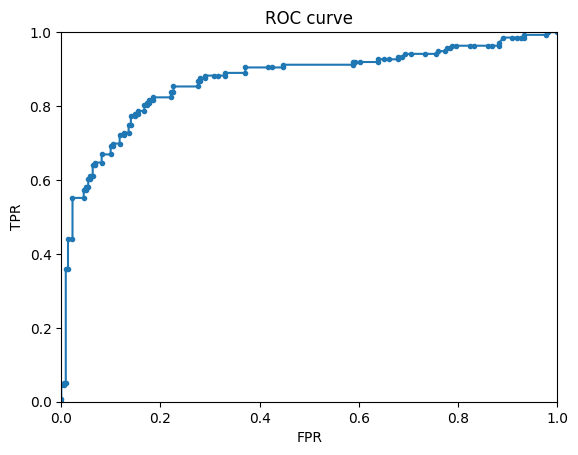

In [19]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    
plt.plot(fpr, tpr, marker='.')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')

In [20]:
from sklearn.metrics import auc
auc_metric = auc(fpr, tpr)

print(auc_metric)

0.8694936119244078
